# Simple Machine Learning Concepts

In this notebook we're going to explore some simple concepts for machine learning, and then apply them to understand how the basic Regression and Classification algorithms work: Linear Regression, and Logisitic Regression.


## Neural Networks

Neural networks are a class of machine learning algorithms used to model complex patterns in datasets using multiple hidden layers and non-linear activation functions. 

A neural network takes an input, passes it through multiple layers of hidden neurons (mini-functions with unique coefficients that must be learned), and outputs a prediction representing the combined input of all the neurons.



### Neurons

A neuron takes a group of weighted inputs, applies an activation function, and returns an output.


**Inputs**
- Inputs to a neuron can either be features from a training set or outputs from a previous layer’s neurons. 

**Weights**
- Weights are applied to the inputs as they travel along synapses to reach the neuron. 
- A neuron’s input equals the sum of weighted outputs from all neurons in the previous layer. 
- Each input is multiplied by the weight associated with the synapse connecting the input to the current neuron. 
    - e.g. If there are 3 inputs or neurons in the previous layer, each neuron in the current layer will have 3 distinct weights — one for each each synapse.

- Single Input

    - 𝑍=𝐼𝑛𝑝𝑢𝑡⋅𝑊𝑒𝑖𝑔ℎ𝑡=𝑋𝑊
- Multiple Inputs

    - 𝑍=∑𝑖=1𝑛𝑥𝑖𝑤𝑖 \
    =𝑥1𝑤1+𝑥2𝑤2+𝑥3𝑤3

**Activation Function**
- Activation functions give neural networks their power — allowing them to model complex non-linear relationships.
- By modifying inputs with non-linear functions neural networks can model highly complex relationships between features. 

** Activation Function Properties**
 - Non-linear - In linear regression we’re limited to a prediction equation that looks like a straight line. This is nice for simple datasets with a one-to-one relationship between inputs and outputs, but what if the patterns in our dataset were non-linear? (e.g. 𝑥2, sin, log). To model these relationships we need a non-linear prediction equation.¹ Activation functions provide this non-linearity.
-  Continuously differentiable — To improve our model with gradient descent, we need our output to have a nice slope so we can compute error derivatives with respect to weights. If our neuron instead outputted 0 or 1 (perceptron), we wouldn’t know in which direction to update our weights to reduce our error.
 - Fixed Range — Activation functions typically squash the input data into a narrow range that makes training the model more stable and efficient.


### Activation Function
- The neuron applies an activation function to the “sum of weighted inputs” from each incoming synapse and passes the result on to all the neurons in the next layer.

#### Activation Function Properties

 - Non-linear - In linear regression we’re limited to a prediction equation that looks like a straight line. This is nice for simple datasets with a one-to-one relationship between inputs and outputs, but what if the patterns in our dataset were non-linear? (e.g. 𝑥2, sin, log). To model these relationships we need a non-linear prediction equation.¹ Activation functions provide this non-linearity.
-  Continuously differentiable — To improve our model with gradient descent, we need our output to have a nice slope so we can compute error derivatives with respect to weights. If our neuron instead outputted 0 or 1 (perceptron), we wouldn’t know in which direction to update our weights to reduce our error.
 - Fixed Range — Activation functions typically squash the input data into a narrow range that makes training the model more stable and efficient.
 
 
#### Types of Activation Functions
 - **Linear**: A straight line function where activation is proportional to input ( which is the weighted sum from neuron ).
    - Pros:

        - It gives a range of activations, so it is not binary activation.
        - We can definitely connect a few neurons together and if more than 1 fires, we could take the max ( or softmax) and decide based on that.
    - Cons:

        - For this function, derivative is a constant. That means, the gradient has no relationship with X.
        - It is a constant gradient and the descent is going to be on constant gradient.
        - If there is an error in prediction, the changes made by back propagation is constant and not depending on the change in input delta(x)!
        
 - **Exponential Linear Unit (ELU)**:  a function that tend to converge cost to zero faster and produce more accurate results. Different to other activation functions, ELU has a extra alpha constant which should be positive number. ELU is very similiar to RELU except negative inputs. They are both in identity function form for non-negative inputs. On the other hand, ELU becomes smooth slowly until its output equal to -α whereas RELU sharply smoothes.
    - Pros:

        - ELU becomes smooth slowly until its output equal to -α whereas RELU sharply smoothes.
        - ELU is a strong alternative to ReLU.
        - Unlike to ReLU, ELU can produce negative outputs.
    - Cons:
        - For x > 0, it can blow up the activation with the output range of [0, inf].
 - **Rectified Linear Units (ReLu)**: The formula is deceptively simple: 𝑚𝑎𝑥(0,𝑧). Despite its name and appearance, it’s not linear and provides the same benefits as Sigmoid but with better performance.
 
    - Pros:
        - It avoids and rectifies vanishing gradient problem.
        - ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations.
    - Cons:
        - One of its limitation is that it should only be used within Hidden layers of a Neural Network Model.
        - Some gradients can be fragile during training and can die. It can cause a weight update which will makes it never activate on any data point again. Simply saying that ReLu could result in Dead Neurons.
        - In another words, For activations in the region (x<0) of ReLu, gradient will be 0 because of which the weights will not get adjusted during descent. That means, those neurons which go into that state will stop responding to variations in error/ input ( simply because gradient is 0, nothing changes ). This is called dying ReLu problem.
        - The range of ReLu is [0, inf). This means it can blow up the activation.
 
- **Sigmoid**: Sigmoid takes a real value as input and outputs another value between 0 and 1. It’s easy to work with and has all the nice properties of activation functions: it’s non-linear, continuously differentiable, monotonic, and has a fixed output range.

     - Pros:
         - It is nonlinear in nature. Combinations of this function are also nonlinear!
         - It will give an analog activation unlike step function.
         - It has a smooth gradient too.
         - It’s good for a classifier.
         - The output of the activation function is always going to be in range (0,1) compared to (-inf, inf) of linear function. So we have our activations bound in a range. Nice, it won’t blow up the activations then.
    - Cons:
        - Towards either end of the sigmoid function, the Y values tend to respond very less to changes in X.
        - It gives rise to a problem of “vanishing gradients”.
        - Its output isn’t zero centered. It makes the gradient updates go too far in different directions. 0 < output < 1, and it makes optimization harder.
        - Sigmoids saturate and kill gradients.
        - The network refuses to learn further or is drastically slow ( depending on use case and until gradient /computation gets hit by floating point value limits ).
        
- **Tanh**: Tanh squashes a real-valued number to the range [-1, 1]. It’s non-linear. But unlike Sigmoid, its output is zero-centered. Therefore, in practice the tanh non-linearity is always preferred to the sigmoid nonlinearity. [1]

    - Pros:
        - The gradient is stronger for tanh than sigmoid ( derivatives are steeper).
    - Cons:
        - Tanh also has the vanishing gradient problem.

- **SoftMax**: Softmax function calculates the probabilities distribution of the event over ‘n’ different events. In general way of saying, this function will calculate the probabilities of each target class over all possible target classes. Later the calculated probabilities will be helpful for determining the target class for the given inputs.


 

### Forward Propagation

*Forward propagation is how neural networks make predictions.*

Input data is “forward propagated” through the network layer by layer to the final layer which outputs a prediction. For the toy neural network, a single pass of forward propagation translates mathematically to:

𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑖𝑜𝑛=𝐴(𝐴(𝑋𝑊ℎ)𝑊𝑜)


Where 𝐴 is an activation function like ReLU, 𝑋 is the input and 𝑊ℎ and 𝑊𝑜 are weights.

**Steps**
1. Calculate the weighted input to the hidden layer by multiplying 𝑋 by the hidden weight 𝑊ℎ
2. Apply the activation function and pass the result to the final layer
3. Repeat step 2 except this time 𝑋 is replaced by the hidden layer’s output, 𝐻

#### Forward Propagation Code

In [41]:
import numpy as np


def init_weights():
    Wh = np.random.randn(INPUT_LAYER_SIZE, HIDDEN_LAYER_SIZE) * \
                np.sqrt(2.0/INPUT_LAYER_SIZE)
    Wo = np.random.randn(HIDDEN_LAYER_SIZE, OUTPUT_LAYER_SIZE) * \
                np.sqrt(2.0/HIDDEN_LAYER_SIZE)

    return Wh, Wo


    
def init_bias():
    Bh = np.full((1, HIDDEN_LAYER_SIZE), 0.1)
    Bo = np.full((1, OUTPUT_LAYER_SIZE), 0.1)
    return Bh, Bo


def relu(Z):
    return np.maximum(0, Z)


def relu_prime(Z):
    '''
    Z - weighted input matrix

    Returns gradient of Z where all
    negative values are set to 0 and
    all positive values set to 1
    '''
    Z[Z < 0] = 0
    Z[Z > 0] = 1
    return Z

def cost(yHat, y):
    cost = np.sum((yHat - y)**2) / 2.0
    return cost

def cost_prime(yHat, y):
    return yHat - y

def feed_forward(X, Wh, Wo):
    '''
    X    - input matrix
    Zh   - hidden layer weighted input
    Zo   - output layer weighted input
    H    - hidden layer activation
    y    - output layer
    yHat - output layer predictions
    '''

    # Hidden layer
    Zh = np.dot(X, Wh) + Bh
    H = relu(Zh)

    # Output layer
    Zo = np.dot(H, Wo) + Bo
    yHat = relu(Zo)
    return yHat, Zo, Zh

In [42]:
X = np.array([[2,2,2]]).T
print('Input Data Shape {}'.format(X.shape))
INPUT_LAYER_SIZE = X.shape[1]
HIDDEN_LAYER_SIZE = 2
OUTPUT_LAYER_SIZE = 2
Wh, Wo = init_weights()
Bh, Bo = init_bias()
feed_forward(X, Wh, Wo)

Input Data Shape (3, 1)


(array([[0., 0.],
        [0., 0.],
        [0., 0.]]), array([[-0.98899664, -0.49435784],
        [-0.98899664, -0.49435784],
        [-0.98899664, -0.49435784]]), array([[-1.73498958,  1.1459061 ],
        [-1.73498958,  1.1459061 ],
        [-1.73498958,  1.1459061 ]]))

### Backward Propagation

The goals of backpropagation are straightforward: adjust each weight in the network in proportion to how much it contributes to overall error. If we iteratively reduce each weight’s error, eventually we’ll have a series of weights that produce good predictions.

As seen above, foward propagation can be viewed as a long series of nested equations. If you think of feed forward this way, then backpropagation is merely an application the Chain rule to find the Derivatives of cost with respect to any variable in the nested equation. Given a forward propagation function:

𝑓(𝑥)=𝐴(𝐵(𝐶(𝑥)))

A, B, and C are activation functions at different layers. Using the chain rule we easily calculate the derivative of 𝑓(𝑥) with respect to 𝑥:

𝑓′(𝑥)=𝑓′(𝐴)⋅𝐴′(𝐵)⋅𝐵′(𝐶)⋅𝐶′(𝑥)

How about the derivative with respect to B? To find the derivative with respect to B you can pretend 𝐵(𝐶(𝑥)) is a constant, replace it with a placeholder variable B, and proceed to find the derivative normally with respect to B.

𝑓′(𝐵)=𝑓′(𝐴)⋅𝐴′(𝐵)

This simple technique extends to any variable within a function and allows us to precisely pinpoint the exact impact each variable has on the total output.


**Working out Derivatives during Backward propagation**

Let’s use the chain rule to calculate the derivative of cost with respect to any weight in the network. The chain rule will help us identify how much each weight contributes to our overall error and the direction to update each weight to reduce our error. Here are the equations we need to make a prediction and calculate total error, or cost:

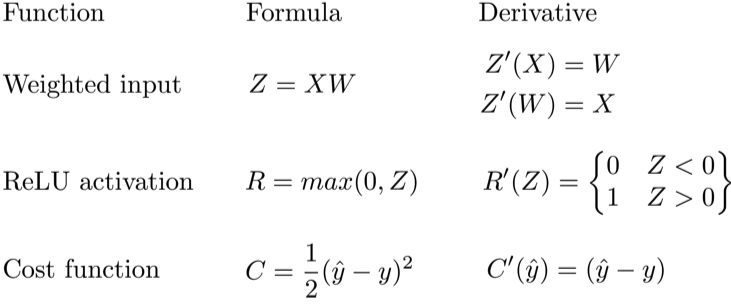

Given a network consisting of a single neuron, total cost could be calculated as:

𝐶𝑜𝑠𝑡=𝐶(𝑅(𝑍(𝑋𝑊)))

Using the chain rule we can easily find the derivative of Cost with respect to weight W.

𝐶′(𝑊)=𝐶′(𝑅)⋅𝑅′(𝑍)⋅𝑍′(𝑊)=(𝑦̂ −𝑦)⋅𝑅′(𝑍)⋅𝑋

Now that we have an equation to calculate the derivative of cost with respect to any weight, let’s go back to our toy neural network.



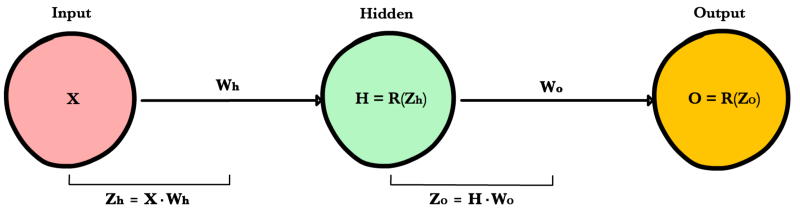

What is the derivative of cost with respect to 𝑊𝑜?

𝐶′(𝑊𝑂)=𝐶′(𝑦̂ )⋅𝑦̂ ′(𝑍𝑂)⋅𝑍′𝑂(𝑊𝑂)=(𝑦̂ −𝑦)⋅𝑅′(𝑍𝑂)⋅𝐻

And how about with respect to 𝑊ℎ? To find out we just keep going further back in our function applying the chain rule recursively until we get to the function that has the Wh term.

𝐶′(𝑊ℎ)=𝐶′(𝑦̂ )⋅𝑂′(𝑍𝑜)⋅𝑍′𝑜(𝐻)⋅𝐻′(𝑍ℎ)⋅𝑍′ℎ(𝑊ℎ)=(𝑦̂ −𝑦)⋅𝑅′(𝑍𝑜)⋅𝑊𝑜⋅𝑅′(𝑍ℎ)⋅𝑋

And just for fun, what if our network had 10 hidden layers. What is the derivative of cost for the first weight 𝑤1?

𝐶′(𝑤1)=𝑑𝐶𝑑𝑦̂ ⋅𝑑𝑦̂ 𝑑𝑍11⋅𝑑𝑍11𝑑𝐻10⋅𝑑𝐻10𝑑𝑍10⋅𝑑𝑍10𝑑𝐻9⋅𝑑𝐻9𝑑𝑍9⋅𝑑𝑍9𝑑𝐻8⋅𝑑𝐻8𝑑𝑍8⋅𝑑𝑍8𝑑𝐻7⋅𝑑𝐻7𝑑𝑍7⋅𝑑𝑍7𝑑𝐻6⋅𝑑𝐻6𝑑𝑍6⋅𝑑𝑍6𝑑𝐻5⋅𝑑𝐻5𝑑𝑍5⋅𝑑𝑍5𝑑𝐻4⋅𝑑𝐻4𝑑𝑍4⋅𝑑𝑍4𝑑𝐻3⋅𝑑𝐻3𝑑𝑍3⋅𝑑𝑍3𝑑𝐻2⋅𝑑𝐻2𝑑𝑍2⋅𝑑𝑍2𝑑𝐻1⋅𝑑𝐻1𝑑𝑍1⋅𝑑𝑍1𝑑𝑊1

**Memoization**
- In memoization we store previously computed results to avoid recalculating the same function. It’s handy for speeding up recursive functions of which backpropagation is one. Notice the pattern in the derivative equations below.
- Each of these layers is recomputing the same derivatives! Instead of writing out long derivative equations for every weight, we can use memoization to save our work as we backprop error through the network. 
- To do this, we define 3 equations (below), which together encapsulate all the calculations needed for backpropagation. The math is the same, but the equations provide a nice shorthand we can use to track which calculations we’ve already performed and save our work as we move backwards through the network.

**Output Layer**
- To calculate output layer error we need to find the derivative of cost with respect to the output layer input, 𝑍𝑜. It answers the question — how are the final layer’s weights impacting overall error in the network? The derivative is then:

𝐶′(𝑍𝑜)=(𝑦̂ −𝑦)⋅𝑅′(𝑍𝑜)

- To simplify notation, ml practitioners typically replace the (𝑦̂ −𝑦)∗𝑅′(𝑍𝑜) sequence with the term 𝐸𝑜. So our formula for output layer error equals:

𝐸𝑜=(𝑦̂ −𝑦)⋅𝑅′(𝑍𝑜)

**Hidden Layer**

To calculate hidden layer error we need to find the derivative of cost with respect to the hidden layer input, Zh.

𝐶′(𝑍ℎ)=(𝑦̂ −𝑦)⋅𝑅′(𝑍𝑜)⋅𝑊𝑜⋅𝑅′(𝑍ℎ)

- Next we can swap in the 𝐸𝑜 term above to avoid duplication and create a new simplified equation for Hidden layer error:

𝐸ℎ=𝐸𝑜⋅𝑊𝑜⋅𝑅′(𝑍ℎ)

- This formula is at the core of backpropagation. We calculate the current layer’s error, and pass the weighted error back to the previous layer, continuing the process until we arrive at our first hidden layer. Along the way we update the weights using the derivative of cost with respect to each weight.

**Derivative of cost w.r.t. any weight**

- To find the derivative of cost with respect to any weight in our network, we simply multiply the corresponding layer’s error times its input (the previous layer’s output):

𝐶′(𝑤)=𝐶𝑢𝑟𝑟𝑒𝑛𝑡𝐿𝑎𝑦𝑒𝑟𝐸𝑟𝑟𝑜𝑟⋅𝐶𝑢𝑟𝑟𝑒𝑛𝑡𝐿𝑎𝑦𝑒𝑟𝐼𝑛𝑝𝑢𝑡

### Back Propagation Code

In [45]:
def relu_prime(z):
    if z > 0:
        return 1
    return 0

def cost(yHat, y):
    return 0.5 * (yHat - y)**2

def cost_prime(yHat, y):
    return yHat - y

def backprop(x, y, Wh, Wo, lr):
    yHat, Zo, Zh = feed_forward(x, Wh, Wo)
    print(Zo)
    # Layer Error
    Eo = (yHat - y) * relu_prime(Zo)
    Eh = Eo * Wo * relu_prime(Zh)

    # Cost derivative for weights
    dWo = Eo * H
    dWh = Eh * x

    # Update weights
    Wh -= lr * dWh
    Wo -= lr * dWo

In [46]:
X = np.array([[2,4,8]]).T
y = np.array([[4,12,24]]).T
backprop(X, y, Wh, Wo, 0.001)

[[-0.98899664 -0.49435784]
 [-1.98295961 -1.03684774]
 [-3.97088555 -2.12182754]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()